## Overview

Housing stock is always in short supply in NYC, and costs have risen considerably over time for both [owners](https://comptroller.nyc.gov/reports/spotlight-new-york-citys-homeowner-housing-market/) and [renters](https://comptroller.nyc.gov/reports/spotlight-new-york-citys-rental-housing-market/#:~:text=In%20the%20ACS%2C%20median%20gross,%2C%20a%20gain%20of%2012%25.). Although [new housing](https://github.com/lnagle/code-diary/tree/main/nyc-housing-analysis) is being built all the time, NYC is also subject to extreme weather and sea level rise due to climate change.

The goal of this project is to investigate how climate change will effect housing stock in NYC. We'll do this by using [NYC Open Data sets](https://opendata.cityofnewyork.us/).


## The Lay of the Land

First let’s get a simple visual of NYC’s boroughs

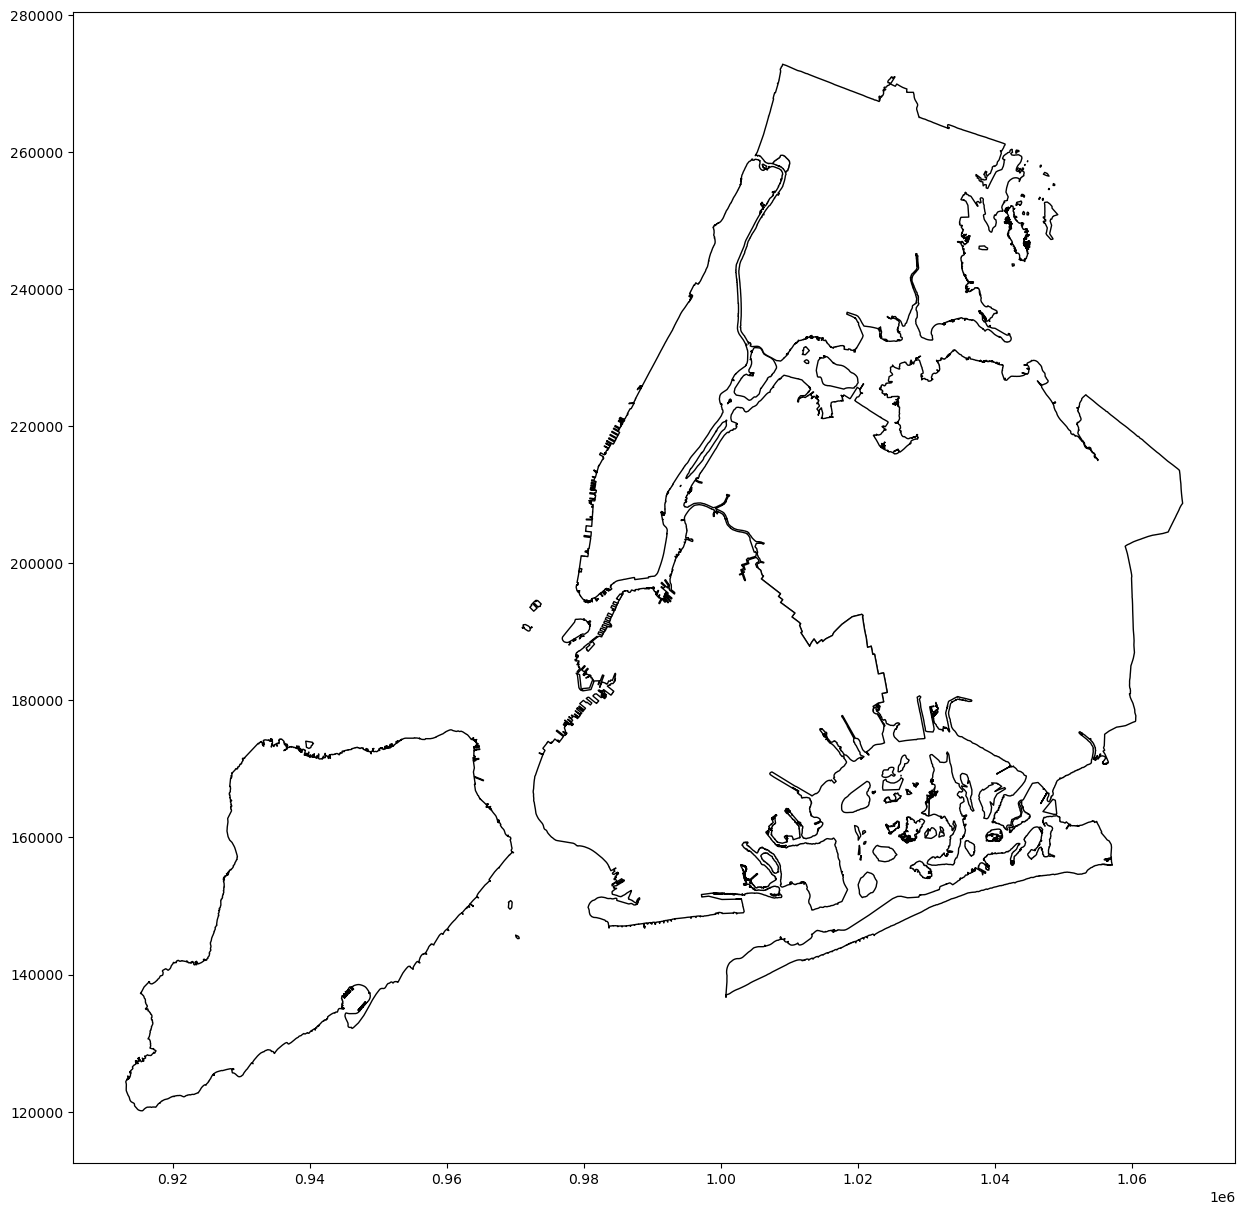

In [9]:
import geopandas
from geodatasets import get_path
import matplotlib.pyplot as plt

path_to_data = get_path("nybb")
nyc_base = geopandas.read_file(path_to_data)

nyc_base = nyc_base.set_index("BoroName")

nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
# nyc_base.set_axis_off()

plt.savefig('images/nycBoroughs')

Now let’s overlay this projected flooding and sea level rise in 2050. For this step, we'll be using [this data set](https://data.cityofnewyork.us/City-Government/NYC-Stormwater-Flood-Map-Moderate-Flood-with-2050-/5rzh-cyqd/about_data) provided by the NYC Department of Environmental Protection (DEP).

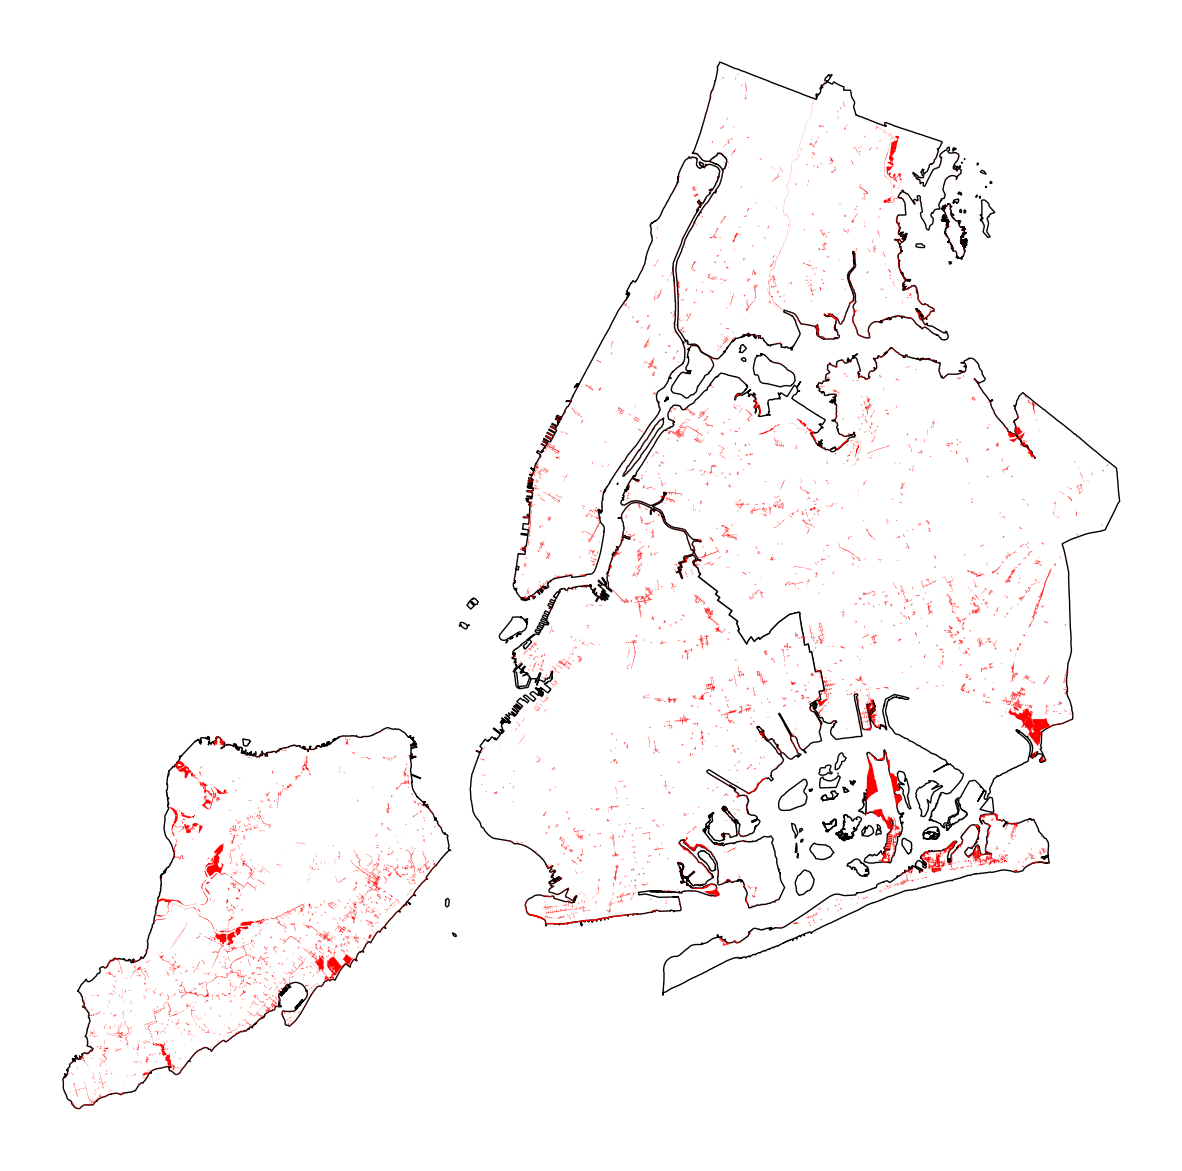

In [11]:
base = nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
base.set_axis_off()

gdf = geopandas.read_file('rawData/floodMapData2050.gdb')

gdf.plot(ax=base, color='red')

plt.savefig('images/flooding2050', dpi=200)


NOTE: Everything below this point is WIP or working notes.

The areas in red indicate a few different forms of flooding. 

In [ ]:
# Map housing - 1st Attempt
# This data set has points where housing developments (new building, demolitions, and renovations have taken place since 2010)
# Having points alone makes it difficult to determine how flood areas affect entire buildings

# points = geopandas.read_file(
#   "rawData/housingData/HousingDB_post2010.shp",
#   # Note: Only map new buildings in Brooklyn for now.
#   where="Job_Type='New Building' AND Boro='3'"
# )

In [ ]:
# Map housing - 2nd Attempt
# Took over 3 minutes to ~attempt~ to download this

# path = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Original'
# building_gdf = geopandas.gpd.read_file(path)

In [ ]:
# Map flood risk areas in 2050

gdf = geopandas.read_file('rawData/floodMapData2050.gdb')
# gdf = gdf.head(2) # Keep both categories of flooding, but remove sea level changes

In [ ]:
# Plot

base = nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
base.set_axis_off()

# points.plot(ax=base, markersize=0.5)

gdf.plot(ax=base, color='red')

plt.savefig('images/newHousingMap', dpi=200)

# Uncomment this to explore the map dynamically
# base = nyc_base.explore(figsize=(15, 15), color='white', edgecolor='black', linewidth=1, tooltip=False)
# points.explore(m=base, markersize=0.5, tooltip=False)
# gdf.explore(m=base, color='red', tooltip=False)

In [ ]:
# Begin exploring the overlap between flood zones and construction

# new_buildings_subject_to_flooding = []

# # Note: Reducing the data size for now for the sake of faster processing
# for i in range(len(points.geometry.values) // 10):
#   x = points.geometry.values[i]
#   contains = gdf.contains(x)
#   if any(contains.values):
#     new_buildings_subject_to_flooding.append(x)

# print(new_buildings_subject_to_flooding)

# '''Working Notes
#   Almost all of the flood zones on the map are within streets and do not overlap with the entirety of buildings
#   The buildings as they are imported currently are simply points.
#   It is likely necessary to expand these points into full building footprints in order to more accurately assess
#     how those buildings are impacted by flooding. This is the next step.
# '''